In [1]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')
#посмотрим на первые 50 записей
df.head(50)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
print('Признаки с пропусками:')
print('Для capital-gain записей c нулем: {}, что составляет {:.2f}%.'.format(df[df['capital-gain'] == 0].count()[0], 100*df[df['capital-gain'] == 0].count()[0]/df.count()[0]))
print('Для capital-loss записей c нулем: {}, что составляет {:.2f}%.'.format(df[df['capital-loss'] == 0].count()[0], 100*df[df['capital-loss'] == 0].count()[0]/df.count()[0]))

print('Для workclass записей c "?": {}, что составляет {:.2f}%.'.format(df[df.workclass == "?"].count()[0], 100*df[df.workclass == "?"].count()[0]/df.count()[0]))
print('Для occupation записей c "?": {}, что составляет {:.2f}%.'.format(df[df.occupation == "?"].count()[0], 100*df[df.occupation == "?"].count()[0]/df.count()[0]))

Признаки с пропусками:
Для capital-gain записей c нулем: 44807, что составляет 91.74%.
Для capital-loss записей c нулем: 46560, что составляет 95.33%.
Для workclass записей c "?": 2799, что составляет 5.73%.
Для occupation записей c "?": 2809, что составляет 5.75%.


In [4]:
#удалим признаки capital-gain, capital-loss из-за отсутствия данных в более чем 90% записей.
del df['capital-loss']
del df['capital-gain']

In [5]:
#посмотрим на категориальные признаки
for i in df.columns:
    if type(df[i][1])== str:
        print(df[i].value_counts(), '\n')

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64 

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical      

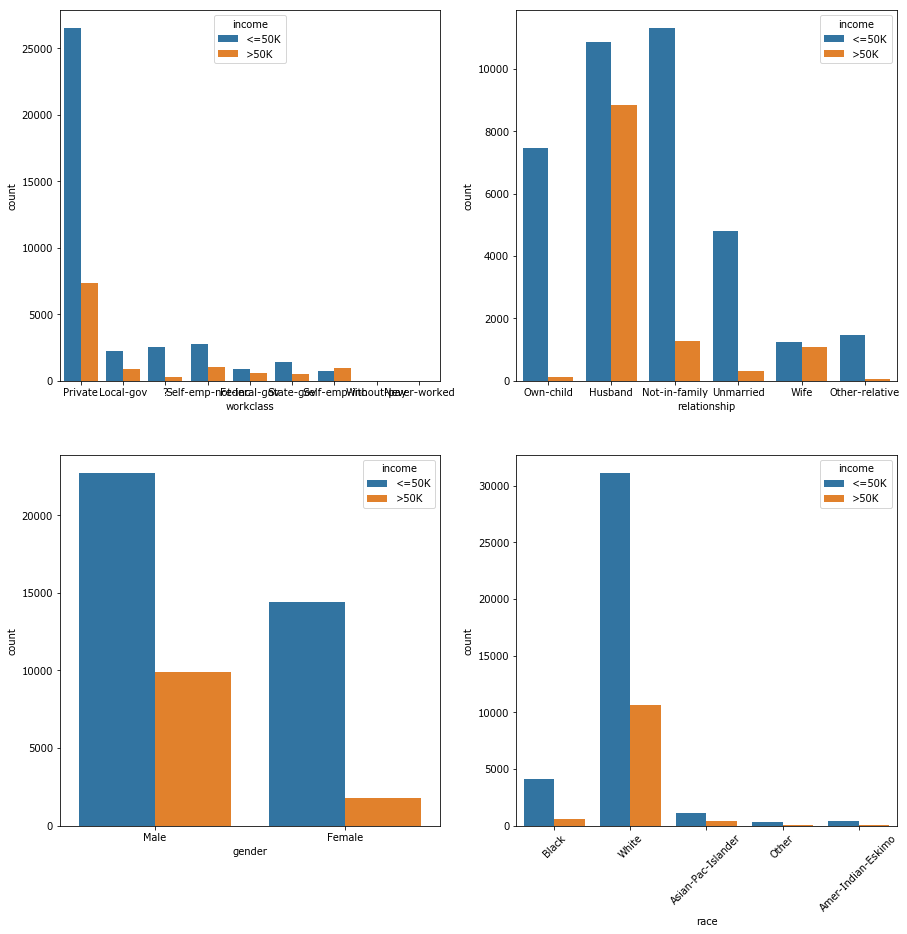

In [6]:
#построим несколько графиков
fig, ((a,b),(c,d)) = plt.subplots(2,2,figsize=(15,15))
plt.xticks(rotation=45)
sns.countplot(df['workclass'],hue=df['income'],ax=a)
sns.countplot(df['relationship'],hue=df['income'],ax=b)
sns.countplot(df['gender'],hue=df['income'],ax=c)
sns.countplot(df['race'],hue=df['income'],ax=d)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
#df['age_bins'] = pd.cut(df.age, bins = [0,18,np.inf], labels =['young', 'old'])

In [9]:
# сформируем датафреймм X для обучения
selectedColumns = df[ ['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'workclass','education', 'marital-status', 'occupation','relationship'] ]

#воспользуемся методом get_dummies для категориальных признаков

X = pd.get_dummies(selectedColumns, columns = ['workclass','education', 'marital-status', 'occupation','relationship'] )

# столбец sex является целевой переменной, удаляем его из X
X.head()

,age,fnlwgt,educational-num,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,226802,7,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,50,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,28,336951,12,40,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,44,160323,10,40,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,18,103497,10,30,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( df['income'] )

y = pd.Series( data = le.transform( df['income']))

In [11]:
model = LogisticRegression()

In [12]:
model.fit( X, y )
predictions = model.predict( X )

C:\Users\Aleksandr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
predictions[:5]

array([0, 0, 0, 0, 0])

In [14]:
model.score(X, y)

0.7607182343065395

In [15]:
#выше получился результат обучения на всей выборке (без разбиения на train и test), далее обучим на 80% выборки

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [18]:
model.fit(X_train,y_train)

C:\Users\Aleksandr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
model.score(X_test,y_test)

0.7561674685228785

**Неплохо, но есть к чему стремится. Например, новейшией алгоритмы градиентного бустинга показывают более точные результаты.**

In [22]:
#проверим как справится с задачей catboost от yandex'а
from catboost import CatBoostClassifier

clf= CatBoostClassifier(learning_rate=0.05, verbose = 500)
clf.fit(X,y)
pred = clf.predict(y, thread_count=-1)

0:	learn: 0.6490994	total: 36.8ms	remaining: 36.7s
500:	learn: 0.3254850	total: 12.2s	remaining: 12.1s
999:	learn: 0.3206175	total: 23.7s	remaining: 0us


CatboostError: c:/goagent/pipelines/buildmaster/catboost.git/catboost/libs/model/model_pool_compatibility.cpp:111: Feature fnlwgt is present in model but not in pool.

In [21]:
clf.score(X,y)

0.8509274804471562

**Видно, что логистическая регрессия уступает категариальному бустингу почти на 10%.**